In [5]:
import pandas as pd 
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf

np.random.seed(0)
n = 100
ar_params = [0.7]
ma_params = []
residuals = np.random.normal(0, 1, n)

values = [0]
for i in range(1, n):
    values.append(ar_params[0] * values[i-1] + residuals[i])
    
dates = pd.date_range(start = '2023-01-01', periods = 100, freq = 'D')

df = pd.DataFrame({'Date': dates, 'Value': values})
df = df.set_index('Date')

c:\ProgramData\Anaconda3\envs\AI\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


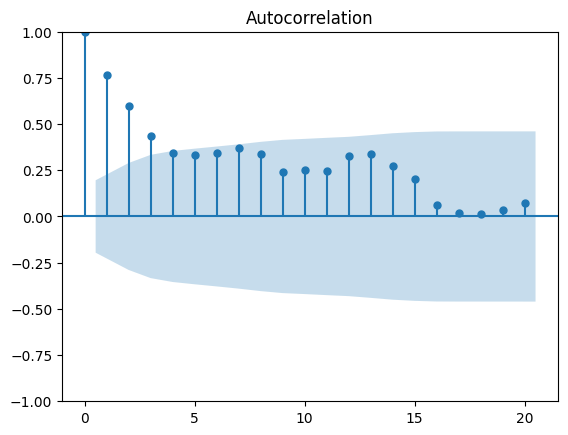

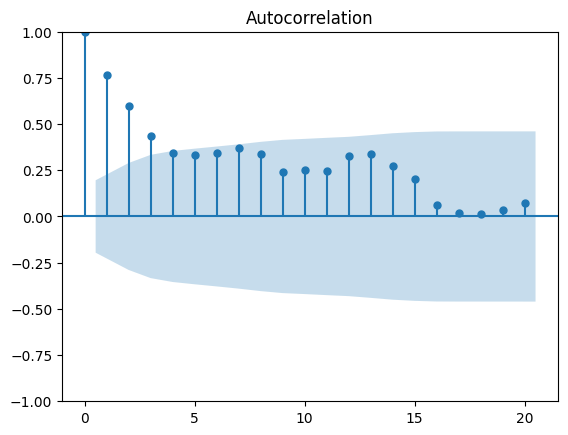

In [6]:
model = AutoReg(df['Value'], lags = 1)
results = model.fit()

plot_acf(df['Value'], lags = 20)

In [7]:
print(df)

print('\n----------------------------------------------------------\n')

print(results.summary())

               Value
Date                
2023-01-01  0.000000
2023-01-02  0.400157
2023-01-03  1.258848
2023-01-04  3.122087
2023-01-05  4.053019
...              ...
2023-04-06  1.868678
2023-04-07  1.318575
2023-04-08  2.708873
2023-04-09  2.023123
2023-04-10  1.818176

[100 rows x 1 columns]

----------------------------------------------------------

                            AutoReg Model Results                             
Dep. Variable:                  Value   No. Observations:                  100
Model:                     AutoReg(1)   Log Likelihood                -139.573
Method:               Conditional MLE   S.D. of innovations              0.991
Date:                Mon, 05 Jun 2023   AIC                            285.147
Time:                        04:35:38   BIC                            292.932
Sample:                    01-02-2023   HQIC                           288.297
                         - 04-10-2023                                         
          

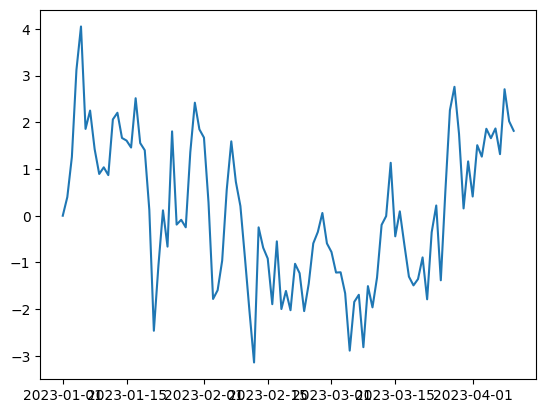

In [9]:
import matplotlib.pyplot as plt

plt.plot(df['Value'])